In [3]:
from pyquil import Program, get_qc
from pyquil.gates import H, CNOT, MEASURE
from functools import reduce
import numpy as np

shots = 1024

p = Program()

ro = p.declare('ro', memory_type='BIT', memory_size=2)

p.inst(H(0))
p.inst(CNOT(0, 1))
p.inst(MEASURE(0, ro[0]))
p.inst(MEASURE(1, ro[1]))

p.wrap_in_numshots_loop(shots)

qc = get_qc('2q-qvm')
results_list = qc.run(p)
results = list(map(lambda arr: reduce(lambda x, y: str(x) + str(y), arr[::-1], ""), results_list))
counts = dict(zip(results,[results.count(i) for i in results]))
print(counts)

{'00': 498, '11': 526}


In [11]:
#!pip uninstall -y pyquil

Found existing installation: pyquil 3.0.1
Uninstalling pyquil-3.0.1:
  Successfully uninstalled pyquil-3.0.1


In [12]:
#!pip install pyquil==2.12

     |████████████████████████████████| 175 kB 8.8 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 117 kB 52.3 MB/s            
  Preparing metadata (setup.py) ... done
  Using cached immutables-0.6-cp38-cp38-linux_x86_64.whl
  Created wheel for pyquil: filename=pyquil-2.12.0-py3-none-any.whl size=201542 sha256=9757f4f564d87def89cac4a1faec22be161f78b6404ba9612332d26e119f87ad
  Stored in directory: /home/paltenmo/.cache/pip/wheels/75/0a/65/576712497e01b91f727466f919eddb573a32c95a124285116b
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=388b5703bcb05e10c2a77c0b9189f61dd286107e8b59f4d647bd4cbac0040271
  Stored in directory: /home/paltenmo/.cache/pip/wheels/b1/a3/c2/6df046c09459b73cc9bb6c4401b0be6c47048baf9a1617c485
Successfully built pyquil antlr4-python3-runtime


In [6]:
import os


In [7]:
QCONVERT = "../node_converter/qconvert-js/cli.js"

In [32]:
PLATFORM = "cirq"

In [33]:
def convert(source_folder, dest_folder, dest_format="pyquil"):
    files = os.listdir(source_folder)
    qasm_files = [f for f in files if f.endswith(".qasm")]
    print(qasm_files)
    for filename in qasm_files:
        src_filepath = os.path.join(source_folder, filename)
        dest_filepath = os.path.join(dest_folder, filename.replace(".qasm", "_" + dest_format) + ".py")
        string_to_execute = f"{QCONVERT} -h -s qasm -d {dest_format} -i {src_filepath} -o {dest_filepath}"
        print(string_to_execute)
        os.system(string_to_execute)

convert(source_folder="../data/experiment_v03/cross_platform/original_programs", 
        dest_folder="../data/experiment_v03/cross_platform/programs/" + PLATFORM, 
        dest_format=PLATFORM)

['2.qasm', '0.qasm', '1.qasm']
../node_converter/qconvert-js/cli.js -h -s qasm -d cirq -i ../data/experiment_v03/cross_platform/original_programs/2.qasm -o ../data/experiment_v03/cross_platform/programs/cirq/2_cirq.py
Q-Convert - Quantum Language Converter

Usage:
    q-convert -i input_file -s source_format -o output_file -d destination_format [-j] [-w]
        -i, --input	Input file
        -s, --source	Source format: qasm, quil, qobj, quantum-circuit, toaster
        -o, --output	Output file
        -d, --dest	Destination format: qiskit, qasm, qobj, quil, pyquil, braket, cirq, tfq, qsharp, quest, js, quantum-circuit, toaster, svg, svg-inline
        -j, --jupyter	Output jupyter notebook (for qiskit, pyquil, braket, cirq, tfq, qsharp, and js only)
        -w, --overwrite	Overwrite output file if it already exists
        -h, --help	Print this help text

Enjoy! :)

../node_converter/qconvert-js/cli.js -h -s qasm -d cirq -i ../data/experiment_v03/cross_platform/original_programs/0.qasm

In [34]:

import subprocess
import sys
import json

print(os.getcwd())

def run_programs(source_folder, dest_folder, python_path = "/home/paltenmo/.conda/envs/ML4Quantum/bin/python3"):
    files = os.listdir(source_folder)
    py_files = [f for f in files if f.endswith(".py")]
    print(py_files)
    for filename in py_files:
        prefix = filename.replace(".py", "")
        print(f"Executing: {filename}")
        with open(os.path.join(dest_folder, prefix + ".json"), 'w') as output_file:
            script_to_execute = os.path.join(source_folder, filename)
            proc = subprocess.Popen(
                [python_path, script_to_execute], 
                stdout=subprocess.PIPE)
            output = str(proc.stdout.read().decode('unicode_escape'))
            output = output.replace("'", '"')
            print(output)
            res = json.loads(output)
            print(res)
            json.dump(res, output_file)
            
run_programs(source_folder="../data/experiment_v03/cross_platform/programs/" + PLATFORM, 
             dest_folder="../data/experiment_v03/cross_platform/executions/" + PLATFORM)            

/home/paltenmo/projects/ML4Quantum/notebooks
['0_cirq.py', '1_cirq.py', '2_cirq.py']
Executing: 0_cirq.py
{"01011": 7, "00001": 344, "11001": 135, "01001": 18, "10011": 2, "10010": 20, "01110": 11, "11100": 68, "01010": 43, "00100": 182, "10000": 3, "01100": 24, "10111": 9, "11110": 9, "11011": 11, "00110": 9, "00011": 5, "10100": 17, "01111": 25, "11000": 2, "00101": 30, "10001": 11, "01101": 1, "10110": 11, "00000": 12, "01000": 3, "11101": 6, "00111": 1, "11111": 2, "10101": 1, "11010": 1, "00010": 1}

{'01011': 7, '00001': 344, '11001': 135, '01001': 18, '10011': 2, '10010': 20, '01110': 11, '11100': 68, '01010': 43, '00100': 182, '10000': 3, '01100': 24, '10111': 9, '11110': 9, '11011': 11, '00110': 9, '00011': 5, '10100': 17, '01111': 25, '11000': 2, '00101': 30, '10001': 11, '01101': 1, '10110': 11, '00000': 12, '01000': 3, '11101': 6, '00111': 1, '11111': 2, '10101': 1, '11010': 1, '00010': 1}
Executing: 1_cirq.py
{"1111101000": 5, "1011101010": 5, "1011111101": 16, "0100000010

{"111010100": 1, "000000001": 20, "000001000": 19, "101001011": 30, "111011000": 4, "111001000": 5, "110000011": 14, "010011011": 4, "100000010": 15, "101010010": 5, "110000001": 23, "110000010": 12, "010001000": 3, "001000001": 12, "100111000": 4, "001001010": 26, "001000000": 3, "011001001": 23, "110100011": 4, "101001001": 25, "101001000": 17, "001010011": 8, "011001110": 2, "101000010": 16, "100110000": 2, "011001011": 16, "001001001": 3, "011000010": 18, "110100111": 2, "000001010": 34, "100001011": 19, "100100000": 2, "100011100": 2, "110100100": 1, "010000000": 12, "111000011": 9, "110001010": 18, "101111011": 2, "100010010": 6, "110001011": 11, "110000000": 10, "011000011": 5, "011011011": 1, "010001001": 13, "010111011": 4, "011001010": 14, "000000010": 9, "011001000": 9, "110011111": 2, "010000010": 11, "100011110": 2, "010110011": 3, "011000001": 13, "000010011": 3, "001011110": 2, "000011111": 4, "011011110": 2, "011000000": 27, "111111011": 1, "101000001": 5, "111110011": 

In [36]:
d = [[1,2,3,4], [2,3,4], [3,4,5,6,7]]
list(set.intersection(*map(set,d)))

[3, 4]

# Inspect Results

In [37]:
import sys
sys.path.append("../lib")
from utils import iterate_over

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
RESULT_PATH = "../data/experiment_v03/cross_platform/predictions"
records = list(zip(*iterate_over(RESULT_PATH, filetype=".json", parse_json=True)))[1]
df_exec = pd.DataFrame.from_records(records)
df_exec.head()

,test,test_long_name,comparison_name,circuit_id,random_seed,statistic_cirq_qiskit,p_value_cirq_qiskit,statistic_pyquil_qiskit,p_value_pyquil_qiskit,statistic_cirq_pyquil,p_value_cirq_pyquil
0,ks,Kolmogorov–Smirnov Test,cross_platform,56,None,0.079102,0.003287,0.042969,0.301025,0.038086,0.447773
1,ks,Kolmogorov–Smirnov Test,cross_platform,79,None,0.041992,0.327394,0.026367,0.868965,0.057617,0.066768
2,ks,Kolmogorov–Smirnov Test,cross_platform,8,None,0.023438,0.941358,0.028320,0.806349,0.032227,0.662484
3,ks,Kolmogorov–Smirnov Test,cross_platform,69,None,0.076172,0.005242,0.050781,0.142604,0.031250,0.699635
4,ks,Kolmogorov–Smirnov Test,cross_platform,19,None,0.022461,0.958583,0.043945,0.276181,0.049805,0.157680


In [54]:
matrix = df_exec[["p_value_cirq_qiskit", "p_value_pyquil_qiskit", "p_value_cirq_pyquil"]].to_numpy()
binary_matrix = np.where(matrix < .05, 1, 0)

<AxesSubplot:>

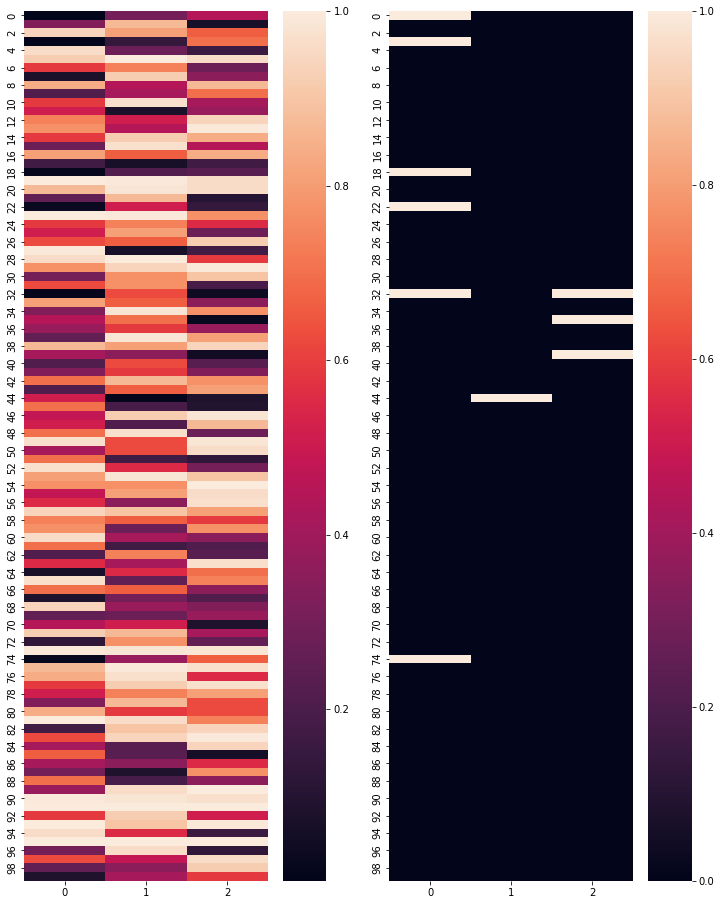

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12,16))
sns.heatmap(
    data=matrix,
    ax=axes[0]
)
sns.heatmap(
    data=binary_matrix,
    ax=axes[1]
)

# Check alert as function of n_qubits

In [56]:
INFO_PATH = "../data/experiment_v03/cross_platform/original_programs"
records = list(zip(*iterate_over(INFO_PATH, filetype=".json", parse_json=True)))[1]
df_info = pd.DataFrame.from_records(records)
df_info.head()

,n_qubits,n_ops,gate_set,strategy_program_generation,circuit_id,benchmark_name
0,6,160,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,56,cross_platform
1,12,155,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,79,cross_platform
2,18,184,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,8,cross_platform
3,7,146,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,69,cross_platform
4,14,54,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,19,cross_platform


In [59]:
df_all = pd.merge(df_info, df_exec.rename(columns={"comparison_name": "benchmark_name"}), on=["circuit_id", "benchmark_name"])

In [61]:
df_all["min_p_value"] = df_all.apply(
    lambda row: min([row["p_value_cirq_qiskit"], row["p_value_cirq_pyquil"], row["p_value_pyquil_qiskit"]]),
    axis=1
)

<AxesSubplot:xlabel='n_qubits', ylabel='min_p_value'>

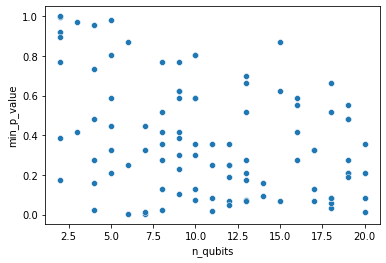

In [63]:
sns.scatterplot(
    data=df_all,
    x="n_qubits",
    y="min_p_value",
)

In [66]:
# get most critical p_values
df_top = df_all.sort_values(by="min_p_value").head(10)
df_top[["circuit_id", "n_qubits", "n_ops", "min_p_value"]]

,circuit_id,n_qubits,n_ops,min_p_value
0,56,6,160,0.003287
3,69,7,146,0.005242
32,37,7,166,0.012638
44,54,20,132,0.014534
18,93,11,132,0.016682
74,17,8,116,0.024931
35,24,4,171,0.024931
22,71,18,75,0.032271
39,42,12,44,0.046830
85,90,18,185,0.059439
